In [2]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

df_features=pd.read_csv('df_features.csv')
df_meta=pd.read_csv('df_meta.csv')

In [4]:
df_features.shape

(48142, 1494)

In [9]:
filtered_shows = df_meta.loc[df_meta['Show'].isin(['Chris Hawkins', 'Radcliffe and Maconie', 'Lauren Laverne',
                                                   'Steve Lamacq','Marc Riley','Shaun Keaveny','Mary Anne Hobbs',
                                                  '6 Music\'s Jukebox','Gideon Coe','6 Music Recommends'])]

In [59]:
X_train, X_test, y_train, y_test =train_test_split(df_features.iloc[filtered_shows.index], 
                                                   filtered_shows.index, test_size=0.2, random_state=42)

In [74]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
y_train_labels = filtered_shows["Show"][y_train]
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train_std, y_train_labels) 
predicted_labels = clf.predict(X_test_std)
y_test_labels = filtered_shows["Show"][y_test]
class_accuracy =accuracy_score(y_test_labels, predicted_labels)
class_accuracy

0.3410696266397578

In [87]:
filtered_shows.loc[y_test].groupby('Show').count().sort_values("Artist", ascending=False)

,Unnamed: 0,Artist,Date,ID,Name,Number,Song,Station,Track_ID,new_date,new_time
Show,,,,,,,,,,,
Chris Hawkins,159,159,159,159,159,159,159,159,159,159,159
Lauren Laverne,138,138,138,138,138,138,138,138,138,138,138
Radcliffe and Maconie,135,135,135,135,135,135,135,135,135,135,135
Steve Lamacq,111,111,111,111,111,111,111,111,111,111,111
Shaun Keaveny,104,104,104,104,104,104,104,104,104,104,104
Marc Riley,95,95,95,95,95,95,95,95,95,95,95
Mary Anne Hobbs,76,76,76,76,76,76,76,76,76,76,76
6 Music's Jukebox,66,66,66,66,66,66,66,66,66,66,66
Gideon Coe,57,57,57,57,57,57,57,57,57,57,57


In [88]:
filtered_shows.loc[y_train].groupby('Show').count().sort_values("Artist", ascending=False)

,Unnamed: 0,Artist,Date,ID,Name,Number,Song,Station,Track_ID,new_date,new_time
Show,,,,,,,,,,,
Radcliffe and Maconie,573,573,573,573,573,573,573,573,573,573,573
Chris Hawkins,571,571,571,571,571,571,571,571,571,571,571
Lauren Laverne,556,556,556,556,556,556,556,556,556,556,556
Steve Lamacq,465,465,465,465,465,465,465,465,465,465,465
Marc Riley,454,454,454,454,454,454,454,454,454,454,454
Shaun Keaveny,382,382,382,382,382,382,382,382,382,382,382
Mary Anne Hobbs,282,282,282,282,282,282,282,282,282,282,282
6 Music's Jukebox,279,279,279,279,279,279,279,279,279,279,279
Gideon Coe,219,219,219,219,219,219,219,219,219,219,219


In [89]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_labels, predicted_labels)

In [90]:
import matplotlib.pyplot as plt
import itertools
%matplotlib inline
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Normalized confusion matrix
[[0.         0.         0.04       0.06       0.46       0.16
  0.         0.18       0.02       0.08      ]
 [0.         0.06060606 0.04545455 0.01515152 0.42424242 0.06060606
  0.         0.1969697  0.07575758 0.12121212]
 [0.         0.         0.46540881 0.03144654 0.25786164 0.06289308
  0.         0.06918239 0.04402516 0.06918239]
 [0.         0.         0.19298246 0.33333333 0.14035088 0.22807018
  0.         0.05263158 0.         0.05263158]
 [0.00724638 0.01449275 0.13043478 0.01449275 0.47101449 0.07246377
  0.         0.08695652 0.05797101 0.14492754]
 [0.         0.         0.07368421 0.06315789 0.05263158 0.55789474
  0.         0.24210526 0.         0.01052632]
 [0.         0.         0.         0.06578947 0.07894737 0.13157895
  0.03947368 0.68421053 0.         0.        ]
 [0.         0.         0.         0.02222222 0.08888889 0.17777778
  0.01481481 0.68888889 0.         0.00740741]
 [0.         0.         0.25961538 0.00961538 0.36538462 0

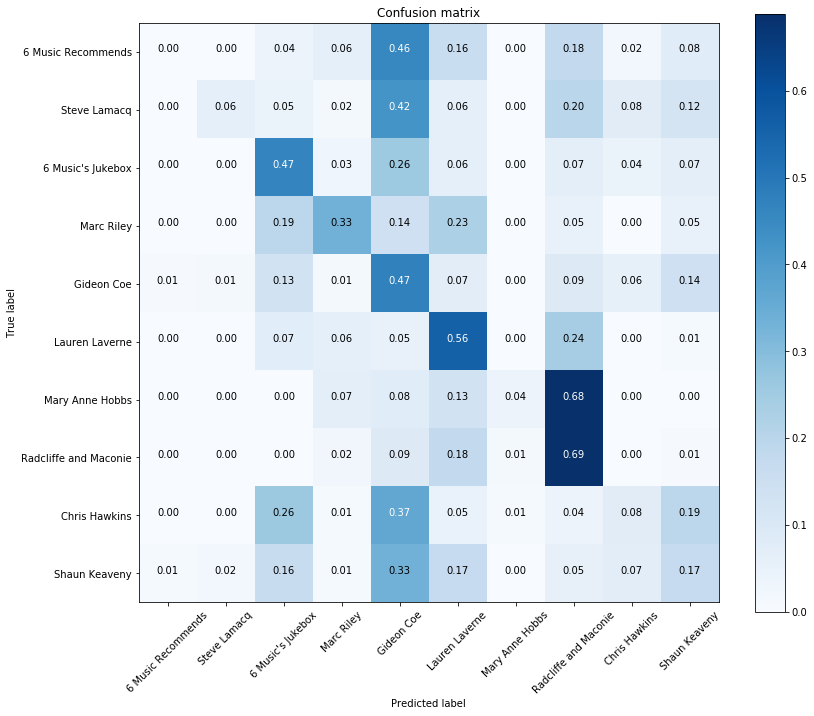

In [94]:
plt.figure(figsize=(12, 10))
plot_confusion_matrix(cm, set(list(predicted_labels)), normalize=True)

In [78]:
predicted_labels

array(['Radcliffe and Maconie', 'Radcliffe and Maconie', 'Steve Lamacq',
       'Lauren Laverne', 'Chris Hawkins', 'Radcliffe and Maconie',
       'Marc Riley', 'Radcliffe and Maconie', 'Chris Hawkins',
       'Radcliffe and Maconie', 'Lauren Laverne', 'Lauren Laverne',
       'Marc Riley', 'Marc Riley', 'Steve Lamacq',
       'Radcliffe and Maconie', 'Chris Hawkins', 'Radcliffe and Maconie',
       'Lauren Laverne', 'Radcliffe and Maconie', 'Radcliffe and Maconie',
       'Lauren Laverne', 'Marc Riley', 'Chris Hawkins', 'Gideon Coe',
       'Radcliffe and Maconie', 'Lauren Laverne', 'Chris Hawkins',
       'Chris Hawkins', 'Marc Riley', 'Chris Hawkins', 'Lauren Laverne',
       'Chris Hawkins', 'Chris Hawkins', 'Lauren Laverne',
       'Radcliffe and Maconie', 'Marc Riley', 'Lauren Laverne',
       'Lauren Laverne', 'Lauren Laverne', 'Radcliffe and Maconie',
       'Radcliffe and Maconie', 'Radcliffe and Maconie',
       'Radcliffe and Maconie', 'Radcliffe and Maconie', 'Shaun Keaveny